In [2]:
import pandas as pd
import pylab as plt

%matplotlib inline

In [3]:
from scipy.spatial.distance import pdist       

from scipy.spatial.distance import squareform 

In [4]:
df = pd.read_csv('cursosp.csv')

In [5]:
ratings=pd.read_csv('cursosp.csv').set_index('Title')

ratings.head()

,Organization,Course_rating,Course_level,Course_certificate,Course_duration,Students_ratings,Web,Course_clases,Course_actual_price,Course_original_price,...,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel
Title,,,,,,,,,,,,,,,,,,,,,
Google Data Analytics,Google,4.8,Beginner,Profesional Certificate,3-6 Months,"105,4k reseñas",Coursera,NaN,NaN,NaN,...,4.5,0.5,2.5,2.5,0.5,2.5,1.5,3.5,2.5,3.5
Google Project Management:,Google,4.8,Beginner,Professional Certificate,3-6 Months,77k reseñas,Coursera,NaN,NaN,NaN,...,1.5,3.5,1.0,2.0,0.5,2.5,4.5,4.5,2.5,4.5
Google UX Design,Google,4.8,Beginner,Professional Certificate,3-6 Months,"59,9k reseñas",Coursera,NaN,NaN,NaN,...,1.5,0.5,4.5,1.0,0.5,3.5,1.5,0.0,2.5,2.0
Google IT Support,Google,4.8,Beginner,Professional Certificate,3-6 Months,165k reseñas,Coursera,NaN,NaN,NaN,...,0.5,0.0,2.0,2.5,2.0,0.5,0.5,2.5,2.0,2.5
IBM Data Science,IBM Skills Network,4.6,Beginner,Professional Certificate,3-6 Months,"107,5k reseñas",Coursera,NaN,NaN,NaN,...,1.0,1.0,2.0,4.5,2.5,1.5,0.5,2.5,3.5,2.0


In [6]:
ratings = ratings.drop(columns=['Organization', 'Course_rating', 'Course_level', 'Course_certificate', 'Course_duration', 'Students_ratings', 'Web', 'Course_clases', 'Course_actual_price', 'Course_original_price'])

In [7]:
ratings = ratings.drop(columns=['Course_price', 'Course_students_enrolled', 'Course_description'])

In [8]:
n_ratings = ratings

In [9]:
def plot(m1, m2):
    
    x=ratings.T[m1]    
    y=ratings.T[m2]

    n=list(ratings.columns)     

    plt.figure(figsize=(10, 5))

    plt.scatter(x, y, s=0)     

    plt.title('Espacio para {} VS. {}'.format(m1, m2), fontsize=14)
    plt.xlabel(m1, fontsize=14)
    plt.ylabel(m2, fontsize=14)

    for i,e in enumerate(n):
        plt.annotate(e, (x[i], y[i]), fontsize=12) 

    plt.show();

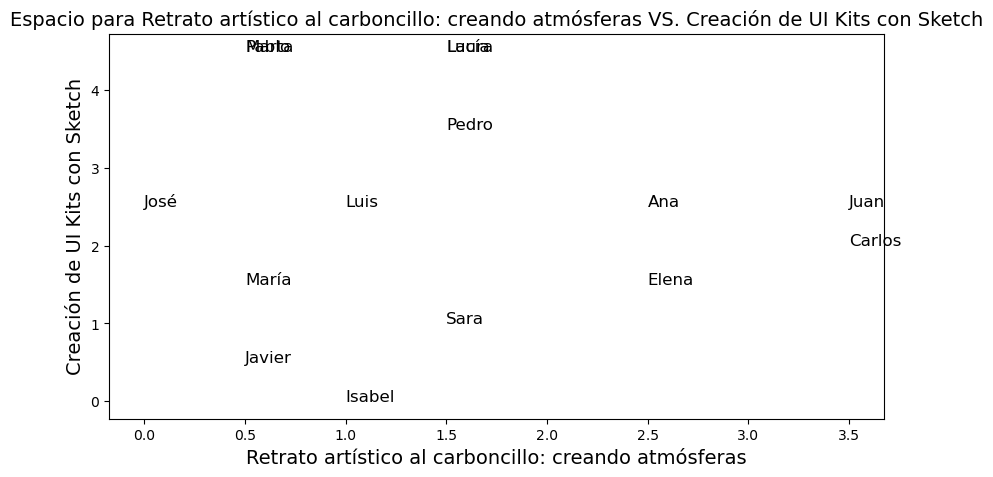

In [10]:
plot('Retrato artístico al carboncillo: creando atmósferas', 'Creación de UI Kits con Sketch')

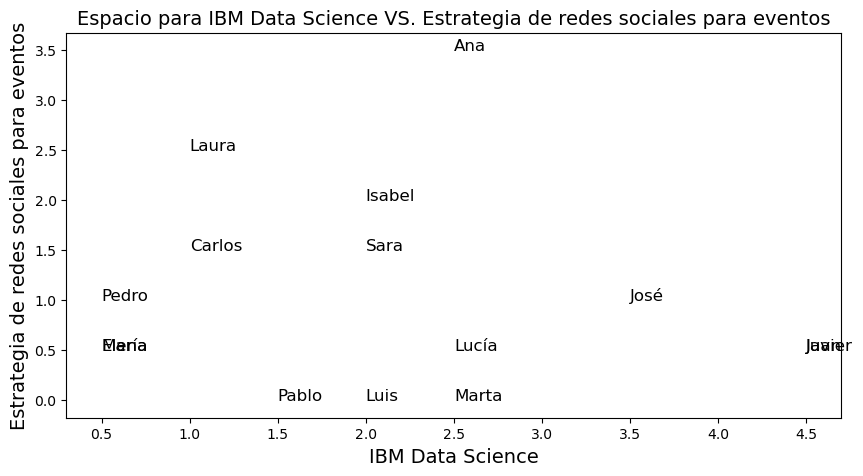

In [11]:
plot('IBM Data Science', 'Estrategia de redes sociales para eventos')

In [12]:
distancias=squareform(pdist(ratings.T, 'euclidean'))    # distancia entre usuarios

distancias

array([[  0.        , 115.46644534, 116.14215428, 115.58871052,
        115.6514159 , 115.74217036, 114.09206809, 118.02118454,
        114.70723604, 115.18463439, 117.59039076, 116.02154972,
        113.95613191, 114.82704385, 114.3820353 ],
       [115.46644534,   0.        , 115.25623627, 114.41044533,
        115.64709248, 115.33971562, 113.26738277, 116.13354382,
        116.26800936, 116.73260042, 113.95174417, 116.06032914,
        114.40935276, 111.83134623, 115.85875021],
       [116.14215428, 115.25623627,   0.        , 115.9967672 ,
        116.49570808, 117.17614945, 115.16726966, 116.34861409,
        115.4631976 , 115.21284651, 114.72140167, 115.32129032,
        115.91160425, 113.75302194, 114.76606641],
       [115.58871052, 114.41044533, 115.9967672 ,   0.        ,
        116.25188171, 117.15374514, 113.91773347, 116.14323054,
        115.06954419, 115.20525162, 114.77042302, 115.54977283,
        115.17703764, 114.85860873, 115.84040746],
       [115.6514159 , 115.64

In [13]:
similitud = 1 / (1+distancias)

similitud

array([[1.        , 0.00858616, 0.00853664, 0.00857716, 0.00857255,
        0.00856588, 0.0086887 , 0.00840187, 0.0086425 , 0.00860699,
        0.00843239, 0.00854543, 0.00869897, 0.00863356, 0.00866686],
       [0.00858616, 1.        , 0.00860169, 0.00866473, 0.00857287,
        0.00859552, 0.0087514 , 0.00853726, 0.00852747, 0.00849382,
        0.0086993 , 0.0085426 , 0.00866481, 0.00886279, 0.00855734],
       [0.00853664, 0.00860169, 1.        , 0.00854724, 0.00851095,
        0.00846194, 0.00860828, 0.00852162, 0.0085864 , 0.0086049 ,
        0.00864144, 0.00859688, 0.00855347, 0.00871437, 0.00863811],
       [0.00857716, 0.00866473, 0.00854724, 1.        , 0.00852865,
        0.00846355, 0.00870188, 0.00853656, 0.00861552, 0.00860546,
        0.00863778, 0.00858003, 0.00860755, 0.00863121, 0.00855868],
       [0.00857255, 0.00857287, 0.00851095, 0.00852865, 1.        ,
        0.00854937, 0.00859888, 0.00851608, 0.0085263 , 0.00854284,
        0.00855402, 0.00861625, 0.00857621, 

In [14]:
similitudes=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

similitudes

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel
Juan,1.000000,0.008586,0.008537,0.008577,0.008573,0.008566,0.008689,0.008402,0.008643,0.008607,0.008432,0.008545,0.008699,0.008634,0.008667
María,0.008586,1.000000,0.008602,0.008665,0.008573,0.008596,0.008751,0.008537,0.008527,0.008494,0.008699,0.008543,0.008665,0.008863,0.008557
Pedro,0.008537,0.008602,1.000000,0.008547,0.008511,0.008462,0.008608,0.008522,0.008586,0.008605,0.008641,0.008597,0.008553,0.008714,0.008638
Ana,0.008577,0.008665,0.008547,1.000000,0.008529,0.008464,0.008702,0.008537,0.008616,0.008605,0.008638,0.008580,0.008608,0.008631,0.008559
Luis,0.008573,0.008573,0.008511,0.008529,1.000000,0.008549,0.008599,0.008516,0.008526,0.008543,0.008554,0.008616,0.008576,0.008496,0.008464
Laura,0.008566,0.008596,0.008462,0.008464,0.008549,1.000000,0.008599,0.008517,0.008557,0.008557,0.008462,0.008674,0.008564,0.008596,0.008500
Carlos,0.008689,0.008751,0.008608,0.008702,0.008599,0.008599,1.000000,0.008536,0.008707,0.008648,0.008662,0.008648,0.008696,0.008720,0.008613
Sara,0.008402,0.008537,0.008522,0.008537,0.008516,0.008517,0.008536,1.000000,0.008548,0.008504,0.008545,0.008478,0.008595,0.008608,0.008617
Javier,0.008643,0.008527,0.008586,0.008616,0.008526,0.008557,0.008707,0.008548,1.000000,0.008616,0.008713,0.008670,0.008783,0.008628,0.008686
Lucía,0.008607,0.008494,0.008605,0.008605,0.008543,0.008557,0.008648,0.008504,0.008616,1.000000,0.008633,0.008641,0.008714,0.008548,0.008636


In [15]:
import numpy as np
random_terms = np.random.choice(df['Title'], size=25, replace=False)

In [16]:
random_numbers = np.random.randint(low=1, high=6, size=25)
random_numbers

array([3, 4, 3, 1, 2, 4, 4, 1, 3, 2, 5, 4, 2, 4, 2, 1, 4, 4, 4, 4, 3, 3,
       5, 1, 3])

In [17]:
random_terms

array(['Key Technologies for Business',
       'Grabado contemporáneo en linóleo', 'Bookkeeping Basics',
       'Técnicas creativas para ilustración de portadas',
       'Curso de Automation Testing Mobile con Katalon Studio\nComenzá a automatizar pruebas móviles con Katalon Studio desde cero. No se necesitan conocimientos previos.',
       'Fundamentos de las florituras en la caligrafía inglesa',
       'Tekla Stuctures 2021, Diseño en concreto armado\nTEKLA STRUCTURES',
       'Introducción al diseño de invitaciones: del briefing a la impresión final',
       'Curación de contenidos para Instagram: encuentra tu nicho',
       'Curso Taller De Excel Desde Cero Hasta Avanzado\nCurso Taller De Excel',
       'Proceso CRUD (C Sharp y MySQL)\nC Sharp y MySQL',
       'Entrepreneurship Strategy: From Ideation to Exit',
       'Introducción a Pro Tools',
       'Convolutional Neural Networks in TensorFlow',
       'Técnicas de ilustración para crear arte botánico contemporáneo',
       'Rec

In [18]:
Fer={'Dibujo de personajes con gouache y lápices de colores' : 1,
       'Storytelling and influencing: Communicate with impact' : 4 ,
       'Introducción a la arquitectura de interiores: reforma una vivienda' : 3,
       'Fundamentals of Accounting' : 4.5,
       'Introducción al moulage: modelado sobre maniquí' : 3.5,
       'Inteligencia Artificial aplicada Proyectos Arquitectónicos\nAprende a generar imágenes digitales para tus diseños de Interiorismo y Arquitectura con Inteligencia Artificial (AI)': 1.5,
       'Cybersecurity Compliance Framework & System Administration' : 4,
       'Ilustración para packaging: crea diseños de productos únicos': 4,
       'Tejido de punto para prendas infantiles' : 3,
       'Curso: Playwright con Javascript en Español\nAprende Automatización de Pruebas con Playwright con Javascritp nivel Basico- Intermedio' : 3.5,
       'Fotografía de retrato en superficies traslúcidas' : 3,
       'WhatsApp Api con PHP Envío y Recepción de Mensajes\nWhatsApp Api con PHP Envío y Recepción de Mensajes, Creación de un Chat BOT, Integración con CHATGPT' : 3,
       'Cómo hacer Campañas de Ingeniería Social\nPhishing 101' : 2.5,
       'Google Sheets. La hoja de Cálculo - Formulas y Funciones\nAprende a usar La hoja de Cálculo de Google con ejercicios de fórmulas y funciones, además desde tu dispositivo móvil.' :3,
       'Curso de Autodesk Inventor 2021\n¿Te gustaría ser más productivo y desarrollar proyectos de la industria Mecánica, Industrial y de Manufactura?' : 2,
       'Diseño de personajes con cerámica: explora el color y la textura' : 4.5,
       'Curso de ChatGPT para principiantes - Aprenda a utilizar el\nUtilización de la inteligencia artificial en los negocios y en la vida cotidiana con el software OpenAI Curso básico' : 2,
       'Aprende JavaScript de CERO a EXPERTO\nAprende JavaScript sin ningún conocimiento previo' : 2,
       'Bordado con textura: combina puntadas y mostacillas' : 3,
       'Retrato experimental con tinta, alcohol y té' : 5,
       'Email marketing para impulsar tu negocio': 5,
       'Ilustración con acrílico: crea universos mágicos' : 4,
       'Branding innovador: crea una identidad visual completa' : 3,
       'Finanzas personales' : 0,
       'Creación de paisajes contemporáneos en acuarela' : 3}


In [19]:

ratings['Fer']=pd.Series(Fer)

ratings

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel,Fer
Title,,,,,,,,,,,,,,,,
Google Data Analytics,0.5,4.5,1.5,1.0,1.5,4.5,0.5,2.5,2.5,0.5,2.5,1.5,3.5,2.5,3.5,NaN
Google Project Management:,2.5,4.5,2.5,4.5,1.0,1.5,3.5,1.0,2.0,0.5,2.5,4.5,4.5,2.5,4.5,NaN
Google UX Design,2.0,1.0,1.5,0.5,0.0,1.5,0.5,4.5,1.0,0.5,3.5,1.5,0.0,2.5,2.0,NaN
Google IT Support,1.0,3.5,0.5,2.5,2.5,0.5,0.0,2.0,2.5,2.0,0.5,0.5,2.5,2.0,2.5,NaN
IBM Data Science,4.5,0.5,0.5,2.5,2.0,1.0,1.0,2.0,4.5,2.5,1.5,0.5,2.5,3.5,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retrato artístico al carboncillo: creando atmósferas,3.5,0.5,1.5,2.5,1.0,1.5,3.5,1.5,0.5,1.5,0.5,2.5,0.5,0.0,1.0,NaN
Creación de UI Kits con Sketch,2.5,1.5,3.5,2.5,2.5,4.5,2.0,1.0,0.5,4.5,4.5,1.5,4.5,2.5,0.0,NaN
Adobe After Effects para animación de personajes,1.5,1.0,4.5,2.5,0.0,2.0,2.5,4.5,1.5,0.5,2.5,1.5,1.0,1.5,0.5,NaN


In [20]:
datarating = ratings[ratings['Fer'].notnull()]

In [21]:
datarating

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel,Fer
Title,,,,,,,,,,,,,,,,
Fundamentals of Accounting,1.5,1.0,2.0,2.0,4.5,1.0,0.5,4.5,0.5,1.5,0.5,3.5,2.5,3.5,3.5,4.5
Cybersecurity Compliance Framework & System Administration,2.0,1.5,2.5,1.0,0.0,3.5,1.5,0.5,0.5,2.5,0.5,0.5,4.5,1.0,1.5,4.0
Finanzas personales,1.0,1.5,0.5,1.0,1.5,4.5,4.5,0.0,1.0,3.5,4.5,3.5,1.5,3.5,1.5,0.0
Storytelling and influencing: Communicate with impact,0.5,3.5,2.5,0.0,0.5,0.0,2.5,2.5,0.0,4.5,2.5,0.5,0.0,2.5,2.5,4.0
"Google Sheets. La hoja de Cálculo - Formulas y Funciones\nAprende a usar La hoja de Cálculo de Google con ejercicios de fórmulas y funciones, además desde tu dispositivo móvil.",1.5,1.0,4.5,2.5,4.5,2.0,2.5,1.5,0.5,1.5,0.5,1.5,2.5,0.5,0.0,3.0
"Curso de Autodesk Inventor 2021\n¿Te gustaría ser más productivo y desarrollar proyectos de la industria Mecánica, Industrial y de Manufactura?",0.5,0.5,1.5,2.0,2.5,3.5,3.5,1.0,0.5,1.5,2.0,1.0,4.5,0.0,4.5,2.0
Inteligencia Artificial aplicada Proyectos Arquitectónicos\nAprende a generar imágenes digitales para tus diseños de Interiorismo y Arquitectura con Inteligencia Artificial (AI),3.5,1.5,3.5,2.5,4.5,2.5,1.5,0.5,1.5,0.0,4.5,4.5,0.5,2.5,4.5,1.5
Aprende JavaScript de CERO a EXPERTO\nAprende JavaScript sin ningún conocimiento previo,0.5,3.5,1.5,2.5,1.0,2.0,0.5,4.5,1.5,2.0,1.0,2.5,0.0,1.5,0.0,2.0
Curso de ChatGPT para principiantes - Aprenda a utilizar el\nUtilización de la inteligencia artificial en los negocios y en la vida cotidiana con el software OpenAI Curso básico,1.0,2.0,1.0,2.5,3.5,0.0,1.0,1.0,1.5,0.5,1.5,2.5,1.0,0.5,4.5,2.0


In [22]:
distancias=squareform(pdist(datarating.T, 'euclidean')) 

similitud=1/(1+distancias)

similitudes=pd.DataFrame(similitud, index=datarating.columns, columns=datarating.columns)

similitudes

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel,Fer
Juan,1.000000,0.100000,0.115192,0.118581,0.094182,0.091536,0.082942,0.095478,0.093386,0.088340,0.100279,0.090703,0.099177,0.095719,0.094414,0.082479
María,0.100000,1.000000,0.100844,0.110159,0.083020,0.075956,0.095238,0.100987,0.090397,0.085127,0.102302,0.087594,0.090094,0.108688,0.080210,0.074295
Pedro,0.115192,0.100844,1.000000,0.121023,0.102602,0.084626,0.092068,0.091013,0.094764,0.077421,0.097337,0.085467,0.109972,0.099586,0.087594,0.093839
Ana,0.118581,0.110159,0.121023,1.000000,0.109786,0.090195,0.097852,0.097593,0.115627,0.094067,0.110537,0.105591,0.113711,0.107450,0.086245,0.093051
Luis,0.094182,0.083020,0.102602,0.109786,1.000000,0.074685,0.079044,0.082787,0.082942,0.067891,0.088152,0.087410,0.090909,0.079586,0.089894,0.083412
Laura,0.091536,0.075956,0.084626,0.090195,0.074685,1.000000,0.089399,0.076985,0.081138,0.087594,0.099449,0.091747,0.097852,0.081283,0.083176,0.082787
Carlos,0.082942,0.095238,0.092068,0.097852,0.079044,0.089399,1.000000,0.078579,0.118818,0.087502,0.111305,0.102452,0.112488,0.111891,0.074968,0.070374
Sara,0.095478,0.100987,0.091013,0.097593,0.082787,0.076985,0.078579,1.000000,0.084134,0.087871,0.082479,0.084053,0.084379,0.090499,0.075897,0.097082
Javier,0.093386,0.090397,0.094764,0.115627,0.082942,0.081138,0.118818,0.084134,1.000000,0.082942,0.092720,0.096208,0.097465,0.100560,0.079044,0.070847
Lucía,0.088340,0.085127,0.077421,0.094067,0.067891,0.087594,0.087502,0.087871,0.082942,1.000000,0.088721,0.092610,0.087047,0.096956,0.074911,0.091221


In [23]:
simil_score=similitudes['Fer'].sort_values(ascending=False)[1:]

simil_score

Sara      0.097082
Pedro     0.093839
Ana       0.093051
Lucía     0.091221
Marta     0.088246
Luis      0.083412
Laura     0.082787
Juan      0.082479
José      0.078844
Elena     0.077993
Pablo     0.077737
Isabel    0.075779
María     0.074295
Javier    0.070847
Carlos    0.070374
Name: Fer, dtype: float64

In [24]:
n_ratings

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel,Fer
Title,,,,,,,,,,,,,,,,
Google Data Analytics,0.5,4.5,1.5,1.0,1.5,4.5,0.5,2.5,2.5,0.5,2.5,1.5,3.5,2.5,3.5,NaN
Google Project Management:,2.5,4.5,2.5,4.5,1.0,1.5,3.5,1.0,2.0,0.5,2.5,4.5,4.5,2.5,4.5,NaN
Google UX Design,2.0,1.0,1.5,0.5,0.0,1.5,0.5,4.5,1.0,0.5,3.5,1.5,0.0,2.5,2.0,NaN
Google IT Support,1.0,3.5,0.5,2.5,2.5,0.5,0.0,2.0,2.5,2.0,0.5,0.5,2.5,2.0,2.5,NaN
IBM Data Science,4.5,0.5,0.5,2.5,2.0,1.0,1.0,2.0,4.5,2.5,1.5,0.5,2.5,3.5,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retrato artístico al carboncillo: creando atmósferas,3.5,0.5,1.5,2.5,1.0,1.5,3.5,1.5,0.5,1.5,0.5,2.5,0.5,0.0,1.0,NaN
Creación de UI Kits con Sketch,2.5,1.5,3.5,2.5,2.5,4.5,2.0,1.0,0.5,4.5,4.5,1.5,4.5,2.5,0.0,NaN
Adobe After Effects para animación de personajes,1.5,1.0,4.5,2.5,0.0,2.0,2.5,4.5,1.5,0.5,2.5,1.5,1.0,1.5,0.5,NaN


In [25]:
Cursosfer = ['Dibujo de personajes con gouache y lápices de colores',
       'Storytelling and influencing: Communicate with impact',
       'Introducción a la arquitectura de interiores: reforma una vivienda',
       'Fundamentals of Accounting',
       'Introducción al moulage: modelado sobre maniquí',
       'Inteligencia Artificial aplicada Proyectos Arquitectónicos\nAprende a generar imágenes digitales para tus diseños de Interiorismo y Arquitectura con Inteligencia Artificial (AI)'
       'Ilustración para packaging: crea diseños de productos únicos',
       'Tejido de punto para prendas infantiles',
       'Curso: Playwright con Javascript en Español\nAprende Automatización de Pruebas con Playwright con Javascritp nivel Basico- Intermedio',
       'Fotografía de retrato en superficies traslúcidas',
       'WhatsApp Api con PHP Envío y Recepción de Mensajes\nWhatsApp Api con PHP Envío y Recepción de Mensajes, Creación de un Chat BOT, Integración con CHATGPT',
       'Cómo hacer Campañas de Ingeniería Social\nPhishing 101',
       'Google Sheets. La hoja de Cálculo - Formulas y Funciones\nAprende a usar La hoja de Cálculo de Google con ejercicios de fórmulas y funciones, además desde tu dispositivo móvil.',
       'Curso de Autodesk Inventor 2021\n¿Te gustaría ser más productivo y desarrollar proyectos de la industria Mecánica, Industrial y de Manufactura?',
       'Diseño de personajes con cerámica: explora el color y la textura',
       'Curso de ChatGPT para principiantes - Aprenda a utilizar el\nUtilización de la inteligencia artificial en los negocios y en la vida cotidiana con el software OpenAI Curso básico',
       'Aprende JavaScript de CERO a EXPERTO\nAprende JavaScript sin ningún conocimiento previo',
       'Bordado con textura: combina puntadas y mostacillas',
       'Retrato experimental con tinta, alcohol y té',
       'Email marketing para impulsar tu negocio',
       'Ilustración con acrílico: crea universos mágicos',
       'Branding innovador: crea una identidad visual completa',
       'Finanzas personales',
       'Creación de paisajes contemporáneos en acuarela']

In [26]:
mask = ~n_ratings.index.isin(Cursosfer)

# Crea un nuevo DataFrame sin los índices que contienen los nombres de cursos en la lista
n_ratings_sin_cursos = n_ratings[mask]

In [27]:
n_ratings_sin_cursos = n_ratings_sin_cursos.drop(columns=['Fer'])

In [28]:
reco=n_ratings_sin_cursos.copy()

reco

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel
Title,,,,,,,,,,,,,,,
Google Data Analytics,0.5,4.5,1.5,1.0,1.5,4.5,0.5,2.5,2.5,0.5,2.5,1.5,3.5,2.5,3.5
Google Project Management:,2.5,4.5,2.5,4.5,1.0,1.5,3.5,1.0,2.0,0.5,2.5,4.5,4.5,2.5,4.5
Google UX Design,2.0,1.0,1.5,0.5,0.0,1.5,0.5,4.5,1.0,0.5,3.5,1.5,0.0,2.5,2.0
Google IT Support,1.0,3.5,0.5,2.5,2.5,0.5,0.0,2.0,2.5,2.0,0.5,0.5,2.5,2.0,2.5
IBM Data Science,4.5,0.5,0.5,2.5,2.0,1.0,1.0,2.0,4.5,2.5,1.5,0.5,2.5,3.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retrato artístico al carboncillo: creando atmósferas,3.5,0.5,1.5,2.5,1.0,1.5,3.5,1.5,0.5,1.5,0.5,2.5,0.5,0.0,1.0
Creación de UI Kits con Sketch,2.5,1.5,3.5,2.5,2.5,4.5,2.0,1.0,0.5,4.5,4.5,1.5,4.5,2.5,0.0
Adobe After Effects para animación de personajes,1.5,1.0,4.5,2.5,0.0,2.0,2.5,4.5,1.5,0.5,2.5,1.5,1.0,1.5,0.5


In [29]:
for n,s in dict(simil_score).items():
    
    reco[n]=reco[n]*s  
    
reco['Total']=reco.sum(axis=1)

reco.sort_values('Total', ascending=False)

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel,Total
Title,,,,,,,,,,,,,,,,
Masters en Excel 1\nExcel Básico - Intermedio,0.371156,0.334326,0.422273,0.232628,0.208531,0.289753,0.175934,0.097082,0.318813,0.136831,0.116606,0.350971,0.397106,0.275953,0.189447,3.917408
Reconocimiento de Huella Dactilar en Excel\nHuella dactilar en excel utilizando el lector uaeu 4500 digital persona,0.371156,0.111442,0.140758,0.046526,0.375356,0.372539,0.316682,0.436870,0.000000,0.410493,0.116606,0.194984,0.220614,0.118266,0.341004,3.573295
DaVinci Resolve para corrección de color profesional en cine,0.371156,0.185736,0.328435,0.093051,0.125119,0.372539,0.246308,0.242706,0.177118,0.319272,0.077737,0.350971,0.308860,0.197109,0.151558,3.547675
"Nivel 3. Integrarse en el ecosistema\nVaya más allá de Solidity y comience a explorar herramientas, protocolos y aplicaciones del ecosistema",0.164958,0.185736,0.422273,0.325679,0.166825,0.289753,0.316682,0.097082,0.318813,0.319272,0.272081,0.194984,0.044123,0.275953,0.151558,3.545771
"Uso Profesional de tus archivos en la Nube con Google Drive\nYa nunca más pierdas información importante!, gestiona de forma profesional todos tus archivos almacenados en la nube.",0.082479,0.334326,0.234596,0.046526,0.041706,0.372539,0.246308,0.436870,0.318813,0.410493,0.272081,0.194984,0.308860,0.118266,0.113668,3.532514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3DsMax: Crea una habitación realista de forma rápida\nCrearas una habitación realista en 3DsMax de forma rápida,0.000000,0.074295,0.000000,0.046526,0.125119,0.289753,0.000000,0.000000,0.000000,0.045610,0.194344,0.038997,0.132369,0.039422,0.037889,1.024322
Lettering con Procreate: domina la aplicación,0.123719,0.037147,0.000000,0.046526,0.166825,0.124180,0.035187,0.145623,0.000000,0.045610,0.077737,0.038997,0.044123,0.039422,0.075779,1.000874
Diseña tu propio proceso creativo,0.164958,0.000000,0.046919,0.046526,0.041706,0.041393,0.105561,0.048541,0.000000,0.045610,0.194344,0.077993,0.132369,0.000000,0.037889,0.983809


In [35]:

reco.sort_values('Total', ascending=False).to_csv('recomendaciones.csv')



In [31]:
simil_score

Sara      0.097082
Pedro     0.093839
Ana       0.093051
Lucía     0.091221
Marta     0.088246
Luis      0.083412
Laura     0.082787
Juan      0.082479
José      0.078844
Elena     0.077993
Pablo     0.077737
Isabel    0.075779
María     0.074295
Javier    0.070847
Carlos    0.070374
Name: Fer, dtype: float64

In [32]:
n_ratings_sin_cursos

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel
Title,,,,,,,,,,,,,,,
Google Data Analytics,0.5,4.5,1.5,1.0,1.5,4.5,0.5,2.5,2.5,0.5,2.5,1.5,3.5,2.5,3.5
Google Project Management:,2.5,4.5,2.5,4.5,1.0,1.5,3.5,1.0,2.0,0.5,2.5,4.5,4.5,2.5,4.5
Google UX Design,2.0,1.0,1.5,0.5,0.0,1.5,0.5,4.5,1.0,0.5,3.5,1.5,0.0,2.5,2.0
Google IT Support,1.0,3.5,0.5,2.5,2.5,0.5,0.0,2.0,2.5,2.0,0.5,0.5,2.5,2.0,2.5
IBM Data Science,4.5,0.5,0.5,2.5,2.0,1.0,1.0,2.0,4.5,2.5,1.5,0.5,2.5,3.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retrato artístico al carboncillo: creando atmósferas,3.5,0.5,1.5,2.5,1.0,1.5,3.5,1.5,0.5,1.5,0.5,2.5,0.5,0.0,1.0
Creación de UI Kits con Sketch,2.5,1.5,3.5,2.5,2.5,4.5,2.0,1.0,0.5,4.5,4.5,1.5,4.5,2.5,0.0
Adobe After Effects para animación de personajes,1.5,1.0,4.5,2.5,0.0,2.0,2.5,4.5,1.5,0.5,2.5,1.5,1.0,1.5,0.5


In [33]:
reco

,Juan,María,Pedro,Ana,Luis,Laura,Carlos,Sara,Javier,Lucía,Pablo,Elena,Marta,José,Isabel,Total
Title,,,,,,,,,,,,,,,,
Google Data Analytics,0.041240,0.334326,0.140758,0.093051,0.125119,0.372539,0.035187,0.242706,0.177118,0.045610,0.194344,0.116990,0.308860,0.197109,0.265226,2.690182
Google Project Management:,0.206198,0.334326,0.234596,0.418730,0.083412,0.124180,0.246308,0.097082,0.141694,0.045610,0.194344,0.350971,0.397106,0.197109,0.341004,3.412670
Google UX Design,0.164958,0.074295,0.140758,0.046526,0.000000,0.124180,0.035187,0.436870,0.070847,0.045610,0.272081,0.116990,0.000000,0.197109,0.151558,1.876969
Google IT Support,0.082479,0.260031,0.046919,0.232628,0.208531,0.041393,0.000000,0.194165,0.177118,0.182441,0.038869,0.038997,0.220614,0.157687,0.189447,2.071319
IBM Data Science,0.371156,0.037147,0.046919,0.232628,0.166825,0.082787,0.070374,0.194165,0.318813,0.228052,0.116606,0.038997,0.220614,0.275953,0.151558,2.552591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Retrato artístico al carboncillo: creando atmósferas,0.288677,0.037147,0.140758,0.232628,0.083412,0.124180,0.246308,0.145623,0.035424,0.136831,0.038869,0.194984,0.044123,0.000000,0.075779,1.824741
Creación de UI Kits con Sketch,0.206198,0.111442,0.328435,0.232628,0.208531,0.372539,0.140747,0.097082,0.035424,0.410493,0.349819,0.116990,0.397106,0.197109,0.000000,3.204542
Adobe After Effects para animación de personajes,0.123719,0.074295,0.422273,0.232628,0.000000,0.165573,0.175934,0.436870,0.106271,0.045610,0.194344,0.116990,0.088246,0.118266,0.037889,2.338907
